In [ ]:
# Description: Plot Figure 12 (Subtidal Reynolds stress time series).
# Author:      André Palóczy
# E-mail:      paloczy@gmail.com
# Date:        December/2020

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas import Series, Timestamp, Timedelta
from xarray import DataArray, open_dataset, concat
from dewaveADCP.utils import fourfilt
from cmocean.cm import balance

In [3]:
def ffilt_lp(da, dts, Tmax, Tmin, max_nanfrac=0.1):
    coords = da.coords
    wrk = da.values*np.nan
    nz, nt = wrk.shape
    for k in range(nz):
        aux = da.isel(z=k).values.copy()
        if (np.isnan(aux).sum()/nt)>nt*max_nanfrac:
            continue
        aux[np.isnan(aux)] = np.nanmean(aux)
        wrk[k,:] = fourfilt(aux, dts, Tmax, Tmin)

    return DataArray(wrk, coords=coords, dims=('z', 't'))

In [4]:
plt.close('all')

head = "../../data_reproduce_figs/"
nhours_cutoff = 30
max_nanfrac = 0.5

dts = 10 # [min]
Tmin = 60*nhours_cutoff # [min]
Tmax = 1e6 # [min]

In [5]:
ds1OC40S = open_dataset(head+'OC40S-Ad1rs5-10min_ensembles-nobinmap-bias-corrected.nc').sel(dict(z=slice(0, 30)))
ds2OC40S = open_dataset(head+'OC40S-Ad2rs5-10min_ensembles-nobinmap-bias-corrected.nc').sel(dict(z=slice(0, 30)))
uwOC40S1 = ds1OC40S['uw']
vwOC40S1 = ds1OC40S['vw']
uOC40S1 = ds1OC40S['u']
vOC40S1 = ds1OC40S['v']
uwOC40S2 = ds2OC40S['uw']
vwOC40S2 = ds2OC40S['vw']
uOC40S2 = ds2OC40S['u']
vOC40S2 = ds2OC40S['v']

In [6]:
# Low-pass filter velocities and Reynolds stresses.
uOC40S1 = ffilt_lp(uOC40S1, dts, Tmax, Tmin, max_nanfrac=max_nanfrac)
vOC40S1 = ffilt_lp(vOC40S1, dts, Tmax, Tmin, max_nanfrac=max_nanfrac)
uwOC40S1 = ffilt_lp(uwOC40S1, dts, Tmax, Tmin, max_nanfrac=max_nanfrac)
vwOC40S1 = ffilt_lp(vwOC40S1, dts, Tmax, Tmin, max_nanfrac=max_nanfrac)
uOC40S2 = ffilt_lp(uOC40S2, dts, Tmax, Tmin, max_nanfrac=max_nanfrac)
vOC40S2 = ffilt_lp(vOC40S2, dts, Tmax, Tmin, max_nanfrac=max_nanfrac)
uwOC40S2 = ffilt_lp(uwOC40S2, dts, Tmax, Tmin, max_nanfrac=max_nanfrac)
vwOC40S2 = ffilt_lp(vwOC40S2, dts, Tmax, Tmin, max_nanfrac=max_nanfrac)

<ipython-input-7-8ab721d24774>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs1 = ax1.pcolormesh(t, z, uOC40S1, **kwpcu)
<ipython-input-7-8ab721d24774>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs2 = ax2.pcolormesh(t, z, uwOC40S1*rho0, **kwpcuwvw)
<ipython-input-7-8ab721d24774>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals wit

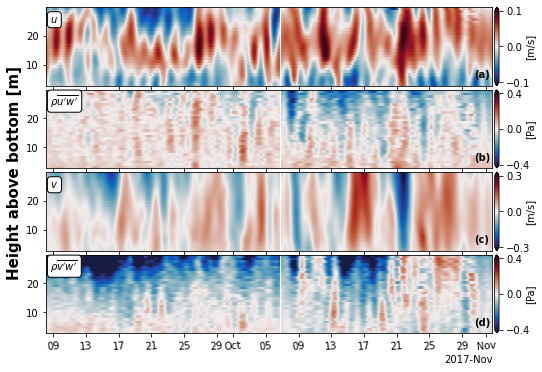

In [7]:
# Plotting.

rho0 = 1024
vmau, vmav = 0.1, 0.3
vmauwvw = 0.4
kwpcu = dict(vmin=-vmau, vmax=vmau, cmap=balance)
kwpcv = dict(vmin=-vmav, vmax=vmav, cmap=balance)
kwpcuwvw = dict(vmin=-vmauwvw, vmax=vmauwvw, cmap=balance)
figsize = (8, 6)

fig, ax = plt.subplots(nrows=4, figsize=figsize, sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = ax

t, z = uOC40S1['t'], uOC40S1['z']
cs1 = ax1.pcolormesh(t, z, uOC40S1, **kwpcu)
cs2 = ax2.pcolormesh(t, z, uwOC40S1*rho0, **kwpcuwvw)
cs3 = ax3.pcolormesh(t, z, vOC40S1, **kwpcv)
cs4 = ax4.pcolormesh(t, z, vwOC40S1*rho0, **kwpcuwvw)

t, z = uOC40S2['t'], uOC40S2['z']
cs1 = ax1.pcolormesh(t, z, uOC40S2, **kwpcu)
cs2 = ax2.pcolormesh(t, z, uwOC40S2*rho0, **kwpcuwvw)
cs3 = ax3.pcolormesh(t, z, vOC40S2, **kwpcv)
cs4 = ax4.pcolormesh(t, z, vwOC40S2*rho0, **kwpcuwvw)
ax3.set_ylabel(r"Height above bottom [m]", fontsize=15, fontweight='black', y=1)
ax1.set_xlim(uOC40S1['t'][0].values, uOC40S2['t'][-1].values)

cbaxpos = [1.005, 0, 0.01, 1]
cbax1 = ax1.inset_axes(cbaxpos)
cb1 = fig.colorbar(cs1, cax=cbax1, extend="both")
cb1.set_ticks([-vmau, 0, vmau])
cb1.set_label(r"[m/s]", labelpad=-5)

cbax2 = ax2.inset_axes(cbaxpos)
cb2 = fig.colorbar(cs2, cax=cbax2, extend="both")
cb2.set_ticks([-vmauwvw, 0, vmauwvw])
cb2.set_label(r"[Pa]", labelpad=-5)

cbax3 = ax3.inset_axes(cbaxpos)
cb3 = fig.colorbar(cs3, cax=cbax3, extend="both")
cb3.set_ticks([-vmav, 0, vmav])
cb3.set_label(r"[m/s]", labelpad=-5)

cbax4 = ax4.inset_axes(cbaxpos)
cb4 = fig.colorbar(cs4, cax=cbax4, extend="both")
cb4.set_ticks([-vmauwvw, 0, vmauwvw])
cb4.set_label(r"[Pa]", labelpad=-5)

bb = dict(boxstyle='round', ec='k', fc='w')
xt, yt = 0.01, 0.8
ax1.text(xt, yt, r"$u$", transform=ax1.transAxes, bbox=bb)
ax2.text(xt, yt, r"$\rho\overline{u'w'}$", transform=ax2.transAxes, bbox=bb)
ax3.text(xt, yt, r"$v$", transform=ax3.transAxes, bbox=bb)
ax4.text(xt, yt, r"$\rho\overline{v'w'}$", transform=ax4.transAxes, bbox=bb)
xt, yt = 0.96, 0.1
ax1.text(xt, yt, r"(a)", fontweight='black', transform=ax1.transAxes)
ax2.text(xt, yt, r"(b)", fontweight='black', transform=ax2.transAxes)
ax3.text(xt, yt, r"(c)", fontweight='black', transform=ax3.transAxes)
ax4.text(xt, yt, r"(d)", fontweight='black', transform=ax4.transAxes)
fig.subplots_adjust(hspace=0.05)

ax4.xaxis.set_tick_params(rotation=5)

locator = mdates.AutoDateLocator(minticks=12, maxticks=20)
formatter = mdates.ConciseDateFormatter(locator)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(formatter)

In [8]:
fig.savefig("fig12.png", dpi=300, bbox_inches="tight")
plt.show()